$$
\newcommand{\F}{\mathbb{F}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\a}{\mathbf{a}}
\newcommand{\b}{\mathbf{b}}
\newcommand{\c}{\mathbf{c}}
\newcommand{\r}{\mathbf{r}}
\newcommand{\u}{\mathbf{u}}
\newcommand{\w}{\mathbf{w}}
\newcommand{\v}{\mathbf{v}}
\newcommand{\x}{\mathbf{x}}
\newcommand{\y}{\mathbf{y}}
\newcommand{\z}{\mathbf{z}}
\newcommand{\0}{\mathbf{0}}
\newcommand{\1}{\mathbf{1}}
\newcommand{\A}{\mathbf{A}}
\newcommand{\B}{\mathbf{B}}
\newcommand{\C}{\mathbf{C}}
\newcommand{\P}{\mathbf{P}}
\newcommand{\U}{\mathbf{U}}
\newcommand{\V}{\mathbf{V}}
\newcommand{\rank}{\textbf{rank}}
$$

## Orthogonal Projections

Most derivations are written in my Ipad.

### Algebraic Definition (Orthogonal Projections)

Let $\V$ be the ambient vector space. A **projection** on a vector subspace $\U \subseteq \V$ is a linear mapping $\pi: \V \to \U$ such that $\pi^2 = \pi$. If $\V$ is an **inner product space**, then $\pi$ can be called an **orthogonal projection**.

### Definition (Projection Matrix)

We can verify that $\pi$ is indeed a **linear transformaton**. Recall that **linear transformation** can be expressed by **transformation matrices**. Thus we define **projection matrices** to be $\P_\pi$ such that $\P_\pi^2 = \P$.

### Derivation of Projection onto a Line $U$[^mml_Derivation of Projection onto a Line]


[^mml_Derivation of Projection onto a Line]: Derivation of Projection onto a Line: **Cambridge University Press: Mathematics for Machine Learning, 2020. (pp. 82-85)**

#### Projection onto the x-axis

**In page 84, the author said if the vector $\x$ is of unit length, then projecting on the horizontal axis yields a projection vector to be $\cos(\omega)$**. This may be confusing at first if you derive it using formula since we see that

$$
\pi_{U}(\x) = \dfrac{\b^\top\x}{|| \b ||^2}\b = \dfrac{||\b|| ||\x|| \cos(\omega)}{||\b||^2} \b = \cos(\omega) ||\x|| \dfrac{\b}{||\b||} \overset{||\x|| = 1}{=} \cos(\omega) \dfrac{\b}{||\b||} 
$$

where did the unit vector $\hat{\b} = \frac{\b}{||\b||}$ go? The confusion lies in two folds, one is author mentioned that this is only true when projecting onto the horizontal axis (x-axis), and secondly, the abuse of notation of vector where I misunderstood $\cos(\omega)$ as the "projection vector". In fact, if we are projecting on the horizontal axis, then the basis vector $\b$ is just $\begin{bmatrix}1 \\0 \end{bmatrix}$ and we have the projection vector to be actually 

$$
\pi_{U}(\x) = \cos(\omega) \dfrac{\b}{||\b||} = \cos(\omega) \begin{bmatrix}1 \\0 \end{bmatrix} = \begin{bmatrix}\cos(\omega) \\0 \end{bmatrix}
$$

and so when mentioned loosely, we can say that the projection vector is just $\cos(\omega)$.

### Derivation of Projection onto a General Subspace $U$[^Cambridge University Press: Mathematics for Machine Learning, 2020. (pp. 85-88)][^Khan's Academy Projection onto a General Subspace]

The derivation using orthogonal complement provides a more intuitive understanding!

[^Cambridge University Press: Mathematics for Machine Learning, 2020. (pp. 85-88)]: Derivation of Projection onto a General Subspace: **Cambridge University Press: Mathematics for Machine Learning, 2020. (pp. 85-88)**
[^Khan's Academy Projection onto a General Subspace]: Derivation of Projection onto a General Subspace: [Khan's Academy Projection onto a General Subspace](https://www.khanacademy.org/math/linear-algebra/alternate-bases/orthogonal-projections/v/lin-alg-a-projection-onto-a-subspace-is-a-linear-transforma)

### Projection Onto Lower Dimensional Subspace

The example here will tell you that given a vector $\x \in \R^3$, it can be projected onto a lower dimensional **subspace** with minimal information loss since their **distance** is lowest. One thing to not get confused is that the projected vector is still in $\R^3$, but it exists in a lower dimensional subspace $\U \subset \R^3$ embedded in $\R^3$ with 2 dimensions.

[^mml_Derivation of Projection onto a General Subspace]: Projection Onto Lower Dimensional Subspace: **Cambridge University Press: Mathematics for Machine Learning, 2020. (pp. 87-88)**

### Python Plot (A Visualization of Projection)

Suppose we have $\u = \begin{bmatrix} 4 \\ 5 \end{bmatrix}$, $\v = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$. Consider the subspace $\U$ spanned by $\v$. We first plot the graph without the projection vector.

The plots and contents (including the visualization of the decomposition) below are entirely credited to MacroAnalyst's GitHub Repo[^https://github.com/MacroAnalyst/Linear_Algebra_With_Python].

[^https://github.com/MacroAnalyst/Linear_Algebra_With_Python]: Plotting Projections in Python: [Plot Projections in Python](https://github.com/MacroAnalyst/Linear_Algebra_With_Python/blob/master/Chapter%2015%20-%20Innear%20Product%20and%20Orthogonality.ipynb)

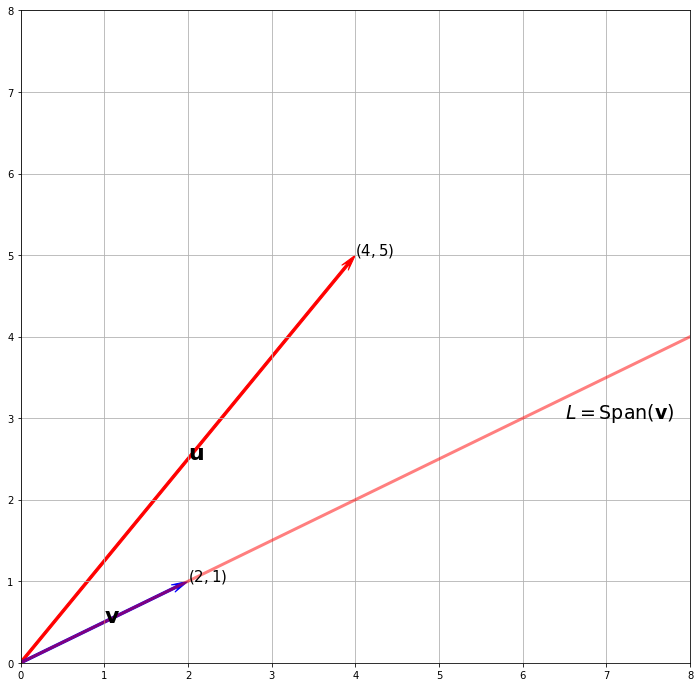

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import scipy.spatial
import sympy as sy
sy.init_printing() 

fig, ax = plt.subplots(figsize=(12, 12))

vects = np.array([[4, 5], [2, 1]])
colr = ["red", "blue"]
cordt = ["$(4, 5)$", "$(2, 1)$"]
vec_name = ["$\mathbf{u}$", "$\mathbf{v}$"]

for i in range(2):
    ax.arrow(
        0,
        0,
        vects[i][0],
        vects[i][1],
        color=colr[i],
        width=0.03,
        length_includes_head=True,
        head_width=0.1,  # default: 3*width
        head_length=0.2,
        overhang=0.4,
    )
    ax.text(x=vects[i][0], y=vects[i][1], s=cordt[i], size=15)
    ax.text(x=vects[i][0] / 2, y=vects[i][1] / 2, s=vec_name[i], size=22)

################################### Subspace L ############################
x = np.linspace(0, 8.1)
y = 1 / 2 * x
ax.plot(x, y, lw=3, color="red", alpha=0.5)
ax.text(x=6.5, y=3, s="$L = \operatorname{Span(\mathbf{v})}$", size=19)

ax.axis([0, 8, 0, 8])
ax.grid()

Next, we plot the projection vector $\pi_{\U}(\u)$ onto $\U$.

In [2]:
u = np.array([4, 5])
v = np.array([2, 1])
alpha = (u @ v) / (v @ v)  # the lambda coordinates
print(alpha)
proj_vec = alpha * v
print(proj_vec)

2.6
[5.2 2.6]


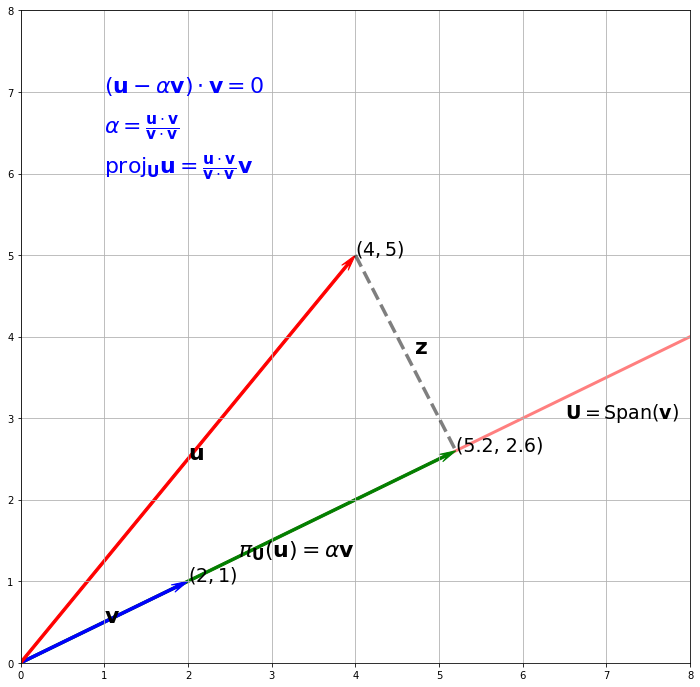

In [3]:
fig, ax = plt.subplots(figsize=(12, 12))

vects = np.array([[4, 5], [2, 1], [5.2, 2.6]])
colr = ["red", "blue", "green"]
cordt = ["$(4, 5)$", "$(2, 1)$", "(5.2, 2.6)"]
vec_name = [
    "$\mathbf{u}$",
    "$\mathbf{v}$",
    r"$\pi_{\mathbf{U}}(\mathbf{u}) = \alpha\mathbf{v}$",
]

for i in range(3):
    ax.arrow(
        0,
        0,
        vects[i][0],
        vects[i][1],
        color=colr[i],
        width=0.03,
        length_includes_head=True,
        head_width=0.1,  # default: 3*width
        head_length=0.2,
        overhang=0.4,
        zorder=-i,
    )
    ax.text(x=vects[i][0], y=vects[i][1], s=cordt[i], size=19)
    ax.text(x=vects[i][0] / 2, y=vects[i][1] / 2, s=vec_name[i], size=22)

##################################### Components of y orthogonal to u ##########################

point1 = [4, 5]
point2 = [5.2, 2.6]
line1 = np.array([point1, point2])
ax.plot(line1[:, 0], line1[:, 1], c="k", lw=3.5, alpha=0.5, ls="--")
ax.text(4.7, 3.8, "$\mathbf{z}$", size=22)
################################### Subspace L ############################
x = np.linspace(0, 8.1)
y = 1 / 2 * x
ax.plot(x, y, lw=3, color="red", alpha=0.5, zorder=-3)
ax.text(x=6.5, y=3, s="$\mathbf{U} = \operatorname{Span(\mathbf{v})}$", size=19)

ax.axis([0, 8, 0, 8])
ax.grid()

#################################### Formula ################################
ax.text(
    x=1,
    y=7,
    s=r"$(\mathbf{u}- \alpha \mathbf{v})\cdot \mathbf{v}= 0$",
    size=22,
    color="b",
)
ax.text(
    x=1,
    y=6.5,
    s=r"$\alpha = \frac{\mathbf{u} \cdot \mathbf{v}}{\mathbf{v}\cdot \mathbf{v}}$",
    size=22,
    color="b",
)
ax.text(
    x=1,
    y=6,
    s=r"$\operatorname{proj}_{\mathbf{U}}\mathbf{u}=\frac{\mathbf{u}\cdot\mathbf{v}}{\mathbf{v}\cdot\mathbf{v}}\mathbf{v}$",
    size=22,
    color="b",
)
plt.show()

### Python Plot (A Visualization of Orthogonal Decomposition)

To generalize the orthogonal projection in the higher dimension $\mathbb{R}^n$, we summarize the idea into the <font face="gotham" color="red"> orthogonal decomposition theorem</font>.

Let $W$ be a subspace of $\mathbb{R}^{n}$. Then each $\mathbf{y}$ in $\mathbb{R}^{n}$ can be written uniquely in the form
$$
\mathbf{y}=\hat{\mathbf{y}}+\mathbf{z}
$$
where $\hat{\mathbf{y}}$ is in $W$ and $\mathbf{z}$ is in $W^{\perp} .$ In fact, if $\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$ is any orthogonal basis of $W,$ then
$$
\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{\mathbf{u}_{1} \cdot \mathbf{u}_{1}} \mathbf{u}_{1}+\cdots+\frac{\mathbf{y} \cdot \mathbf{u}_{p}}{\mathbf{u}_{p} \cdot \mathbf{u}_{p}} \mathbf{u}_{p}
$$
and $\mathbf{z}=\mathbf{y}-\hat{\mathbf{y}}$.

In $\mathbb{R}^{2}$, we project $\mathbf{y}$ onto subspace $L$ which is spanned by $\mathbf{u}$, here we generalize the formula for $\mathbb{R}^{n}$, that $\mathbf{y}$ is projected onto $W$ which is spanned by $\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$.

#### <font face="gotham" color="purple"> A Visual Example in $\mathbb{R}^{3}$</font>

A subspace $W=\operatorname{Span}\left\{\mathbf{u}_{1}, \mathbf{u}_{2}\right\}$, and a vector $\mathbf{y}$ is not in $W$, decompose $\mathbf{y}$ into $\hat{\mathbf{y}} + \mathbf{z}$, and plot them.

where 

$$\mathbf{u}_{1}=\left[\begin{array}{r}
2 \\
5 \\
-1
\end{array}\right], \mathbf{u}_{2}=\left[\begin{array}{r}
-2 \\
1 \\
1
\end{array}\right], \text { and } \mathbf{y}=\left[\begin{array}{l}
1 \\
2 \\
3
\end{array}\right]$$

The projection onto $W$ in $\mathbb{R}^3$ is 

$$
\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{\mathbf{u}_{1} \cdot \mathbf{u}_{1}} \mathbf{u}_{1}+\frac{\mathbf{y} \cdot \mathbf{u}_{2}}{\mathbf{u}_{2} \cdot \mathbf{u}_{2}} \mathbf{u}_{2}=\hat{\mathbf{y}}_{1}+\hat{\mathbf{y}}_{2}
$$

The codes for plotting are quite redundent, however exceedingly intuitive.

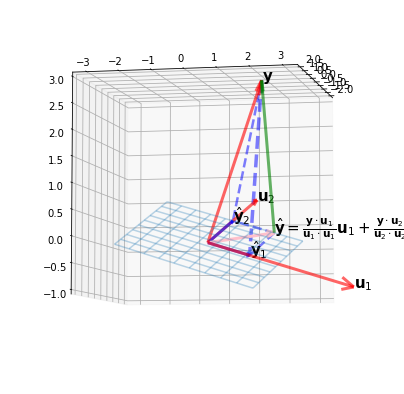

In [4]:
######################## Subspace W ##############################
s = np.linspace(-.5, .5, 10)
t = np.linspace(-.5, .5, 10)
S, T = np.meshgrid(s, t)

X1 = 2 * S - 2 * T
X2 = 5 * S + T
X3 = -S + T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X1, X2, X3, linewidth = 1.5, alpha = .3)

########################### vector y ###############################
y = np.array([1, 2, 3])
u1, u2 = np.array([2, 5, -1]), np.array([-2, 1, 1])

vec = np.array([[0, 0, 0, y[0], y[1], y[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

ax.text(y[0], y[1], y[2], '$\mathbf{y}$', size = 15)
########################### vector u1 and u2 ###############################

vec = np.array([[0, 0, 0, u1[0], u1[1], u1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, u2[0], u2[1], u2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


ax.text(u1[0], u1[1], u1[2], '$\mathbf{u}_1$', size = 15)
ax.text(u2[0], u2[1], u2[2], '$\mathbf{u}_2$', size = 15)
###########################  yhat ###############################

alpha1 = (y@u1)/(u1@u1)
alpha2 = (y@u2)/(u2@u2)

yhat1 = alpha1*u1
yhat2 = alpha2*u2
yhat = yhat1 + yhat2

vec = np.array([[0, 0, 0, yhat1[0], yhat1[1], yhat1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3, zorder= 3)

vec = np.array([[0, 0, 0, yhat2[0], yhat2[1], yhat2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3, zorder= 3)

vec = np.array([[0, 0, 0, yhat[0], yhat[1], yhat[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'pink', alpha = 1,arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 3, zorder= 3)

ax.text(yhat1[0], yhat1[1], yhat1[2], '$\hat{\mathbf{y}}_1$', size = 15)
ax.text(yhat2[0], yhat2[1], yhat2[2], '$\hat{\mathbf{y}}_2$', size = 15)
ax.text(x = yhat[0], y = yhat[1], z = yhat[2], 
        s = r'$\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{u}_{1}}{\mathbf{u}_{1} \cdot \mathbf{u}_{1}} \mathbf{u}_{1}+\frac{\mathbf{y} \cdot \mathbf{u}_{2}}{\mathbf{u}_{2} \cdot \mathbf{u}_{2}} \mathbf{u}_{2}=\hat{\mathbf{y}}_{1}+\hat{\mathbf{y}}_{2}$', size = 15)
###########################  z ###############################
z = y - yhat
vec = np.array([[yhat[0], yhat[1], yhat[2], z[0], z[1], z[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'green', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

############################ Dashed Line ####################

line1 = np.array([y, yhat1])
ax.plot(line1[:,0], line1[:,1], line1[:,2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([y, yhat2])
ax.plot(line2[:,0], line2[:,1], line2[:,2], c = 'b', lw = 2.5,alpha =0.5, ls = '--')

line3 = np.array([yhat, yhat2])
ax.plot(line3[:,0], line3[:,1], line3[:,2], c = 'b', lw = 2.5,alpha =0.5, ls = '--')

line4 = np.array([yhat, yhat1])
ax.plot(line4[:,0], line4[:,1], line4[:,2], c = 'b', lw = 2.5,alpha =0.5, ls = '--')

############################# View Angel
ax.view_init(elev=-6, azim=12)